In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

In [16]:
file_path = '/content/drive/MyDrive/Maestría IA/Proyecto Integrador/data/search_console/Consultas.csv'
df_consultas = pd.read_csv(file_path)

In [17]:
df_consultas.head()

,Consultas principales,Clics,Impresiones,CTR,Posición
0,precio de cortinas metálicas para negocio,34,1011,3.36%,4.67
1,scosnaya,33,74,44.59%,1.20
2,cuanto cuesta una cortina metálica para negocio,27,1129,2.39%,3.71
3,cortinas de acero precios,26,692,3.76%,5.73
4,precio de cortinas para negocio,20,631,3.17%,3.33


In [18]:
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Consultas principales  1000 non-null   object 
 1   Clics                  1000 non-null   int64  
 2   Impresiones            1000 non-null   int64  
 3   CTR                    1000 non-null   object 
 4   Posición               1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [19]:
# PASO 0: Importar librerías y crear un DataFrame de ejemplo

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.decomposition import PCA, FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

print("DataFrame Original:")
print(df_consultas.head())
print("\nInformación del DataFrame Original:")
df_consultas.info()

DataFrame Original:
                             Consultas principales  Clics  Impresiones  \
0        precio de cortinas metálicas para negocio     34         1011   
1                                         scosnaya     33           74   
2  cuanto cuesta una cortina metálica para negocio     27         1129   
3                        cortinas de acero precios     26          692   
4                  precio de cortinas para negocio     20          631   

      CTR  Posición  
0   3.36%      4.67  
1  44.59%      1.20  
2   2.39%      3.71  
3   3.76%      5.73  
4   3.17%      3.33  

Información del DataFrame Original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Consultas principales  1000 non-null   object 
 1   Clics                  1000 non-null   int64  
 2   Impresiones            1000 non-null   int64  
 

In [20]:
# PASO 1: Convertir la columna 'CTR' a numérica
print("\n--- PASO 1: Limpieza de 'CTR' ---")

# Copia para no modificar el original directamente en cada paso (opcional, bueno para experimentación)
df_procesado = df_consultas.copy()

# Quitar el '%' y convertir a float, luego dividir por 100
df_procesado['CTR_numerico'] = df_procesado['CTR'].str.rstrip('%').astype('float') / 100.0

# Eliminamos la columna CTR original si ya no la necesitamos
# df_procesado = df_procesado.drop('CTR', axis=1)

print("\nDataFrame con 'CTR' numérico:")
print(df_procesado[['CTR', 'CTR_numerico']].head())
print("\nInformación después de convertir CTR:")
df_procesado.info()


--- PASO 1: Limpieza de 'CTR' ---

DataFrame con 'CTR' numérico:
      CTR  CTR_numerico
0   3.36%        0.0336
1  44.59%        0.4459
2   2.39%        0.0239
3   3.76%        0.0376
4   3.17%        0.0317

Información después de convertir CTR:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Consultas principales  1000 non-null   object 
 1   Clics                  1000 non-null   int64  
 2   Impresiones            1000 non-null   int64  
 3   CTR                    1000 non-null   object 
 4   Posición               1000 non-null   float64
 5   CTR_numerico           1000 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 47.0+ KB


In [21]:
print("\n--- PASO 2a: Generación de Nuevas Características ---")

# Longitud de la consulta
df_procesado['longitud_consulta'] = df_procesado['Consultas principales'].apply(len)

# Número de palabras en la consulta
df_procesado['num_palabras_consulta'] = df_procesado['Consultas principales'].apply(lambda x: len(x.split()))

print("\nDataFrame con nuevas características de texto (longitud, num_palabras):")
print(df_procesado[['Consultas principales', 'longitud_consulta', 'num_palabras_consulta']].head())

# Generación de características usando TF-IDF (ejemplo básico)
# Esto crea muchas columnas nuevas, una por cada término significativo.
# Para un conjunto de datos grande, considera max_features para limitar el número de términos.
vectorizer_tfidf = TfidfVectorizer(max_features=10) # Considera 10 características más importantes
tfidf_features = vectorizer_tfidf.fit_transform(df_procesado['Consultas principales'])

# Convertir la salida de TF-IDF a un DataFrame
df_tfidf = pd.DataFrame(tfidf_features.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

# Unir las características TF-IDF al DataFrame principal
# Asegúrate de que los índices coincidan si tu df_procesado ha sido filtrado o reordenado
df_procesado = pd.concat([df_procesado.reset_index(drop=True), df_tfidf.reset_index(drop=True)], axis=1)

print("\nDataFrame con características TF-IDF (primeras filas y algunas columnas TF-IDF):")
print(df_procesado.head())


--- PASO 2a: Generación de Nuevas Características ---

DataFrame con nuevas características de texto (longitud, num_palabras):
                             Consultas principales  longitud_consulta  \
0        precio de cortinas metálicas para negocio                 41   
1                                         scosnaya                  8   
2  cuanto cuesta una cortina metálica para negocio                 47   
3                        cortinas de acero precios                 25   
4                  precio de cortinas para negocio                 31   

   num_palabras_consulta  
0                      6  
1                      1  
2                      7  
3                      4  
4                      5  

DataFrame con características TF-IDF (primeras filas y algunas columnas TF-IDF):
                             Consultas principales  Clics  Impresiones  \
0        precio de cortinas metálicas para negocio     34         1011   
1                                        

In [22]:
print("\n--- PASO 2b: Discretización (Binning) ---")

# Ejemplo: Binning para la columna 'Posición'
# Definimos los límites de los bins y las etiquetas
bins_posicion = [0, 3, 10, float('inf')] # De 0 a 3 (no incl.), de 3 a 10 (no incl.), de 10 a infinito
labels_posicion = ['Top 3', 'Pagina 1', 'Otros']

df_procesado['categoria_posicion'] = pd.cut(df_procesado['Posición'],
                                            bins=bins_posicion,
                                            labels=labels_posicion,
                                            right=False) # right=False significa que el intervalo es [inicio, fin)

print("\nDataFrame con 'Posición' discretizada:")
print(df_procesado[['Posición', 'categoria_posicion']].head())


--- PASO 2b: Discretización (Binning) ---

DataFrame con 'Posición' discretizada:
   Posición categoria_posicion
0      4.67           Pagina 1
1      1.20              Top 3
2      3.71           Pagina 1
3      5.73           Pagina 1
4      3.33           Pagina 1


In [23]:
print("\n--- PASO 2c: Codificación ---")

# One-Hot Encoding para 'categoria_posicion' (variable nominal)
# Se crearán nuevas columnas para cada categoría
df_procesado = pd.get_dummies(df_procesado, columns=['categoria_posicion'], prefix='pos')

print("\nDataFrame con 'categoria_posicion' codificada (One-Hot):")
print(df_procesado.filter(like='pos_').head())
print("\nColumnas después de One-Hot Encoding:")
print(df_procesado.columns)


--- PASO 2c: Codificación ---

DataFrame con 'categoria_posicion' codificada (One-Hot):
   pos_Top 3  pos_Pagina 1  pos_Otros
0      False          True      False
1       True         False      False
2      False          True      False
3      False          True      False
4      False          True      False

Columnas después de One-Hot Encoding:
Index(['Consultas principales', 'Clics', 'Impresiones', 'CTR', 'Posición',
       'CTR_numerico', 'longitud_consulta', 'num_palabras_consulta',
       'automaticas', 'cortina', 'cortinas', 'de', 'metalicas', 'negocio',
       'para', 'portones', 'puerta', 'puertas', 'pos_Top 3', 'pos_Pagina 1',
       'pos_Otros'],
      dtype='object')


In [24]:
print("\n--- PASO 2d: Escalamiento ---")

# Seleccionar columnas numéricas para escalar
# Excluimos las booleanas/codificadas y las de texto original, y las ya procesadas por TF-IDF si no se quiere re-escalar
# Es importante identificar correctamente las columnas numéricas que se beneficiarán del escalado.
# Para este ejemplo, tomaremos 'Clics', 'Impresiones', 'CTR_numerico', 'Posición', 'longitud_consulta', 'num_palabras_consulta'.
# Las columnas TF-IDF ya suelen estar en un rango [0,1] o tener propiedades que no siempre requieren escalado adicional,
# pero depende del caso. Aquí no las escalaremos de nuevo.

cols_para_escalar = ['Clics', 'Impresiones', 'CTR_numerico', 'Posición', 'longitud_consulta', 'num_palabras_consulta']
numeric_features_df = df_procesado[cols_para_escalar]

# Estandarización (StandardScaler)
scaler_std = StandardScaler()
df_procesado[cols_para_escalar] = scaler_std.fit_transform(numeric_features_df)

# Normalización (MinMaxScaler) - Alternativa, comentar una de las dos
# scaler_min_max = MinMaxScaler()
# df_procesado[cols_para_escalar] = scaler_min_max.fit_transform(numeric_features_df)

print("\nDataFrame con columnas numéricas escaladas (primeras filas de columnas escaladas):")
print(df_procesado[cols_para_escalar].head())


--- PASO 2d: Escalamiento ---

DataFrame con columnas numéricas escaladas (primeras filas de columnas escaladas):
       Clics  Impresiones  CTR_numerico  Posición  longitud_consulta  \
0  13.659173     2.154930      0.001910 -0.786181           1.716041   
1  13.250412    -0.041952      2.743009 -0.919295          -1.941477   
2  10.797843     2.431592     -0.062579 -0.823008           2.381044   
3  10.389082     1.407006      0.028503 -0.745517          -0.057301   
4   7.936513     1.263986     -0.010722 -0.837585           0.607702   

   num_palabras_consulta  
0               1.879926  
1              -1.967650  
2               2.649441  
3               0.340895  
4               1.110410  



--- PASO 2e: Transformación ---


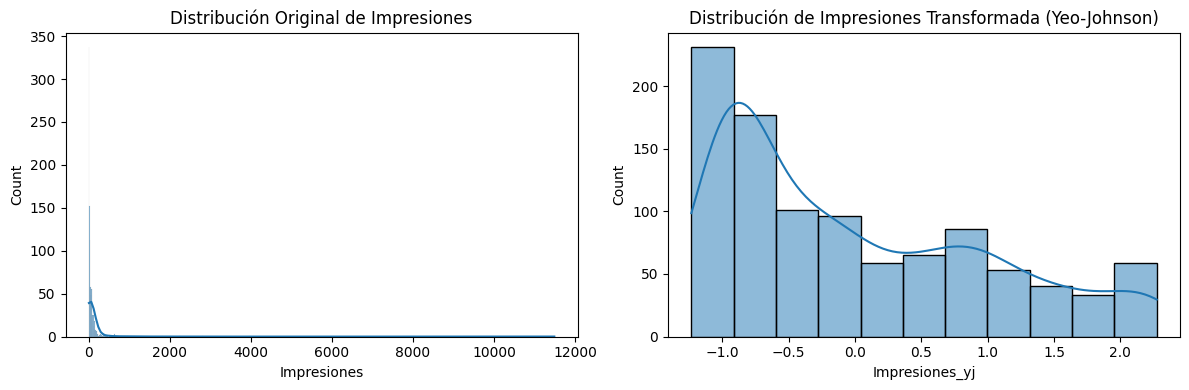


DataFrame con 'Impresiones' transformadas (Yeo-Johnson):
   Impresiones  Impresiones_yj
0     2.154930        2.268693
1    -0.041952        0.777722
2     2.431592        2.270469
3     1.407006        2.254681
4     1.263986        2.248170


In [25]:
print("\n--- PASO 2e: Transformación ---")

# Ejemplo: Transformación de Yeo-Johnson para 'Impresiones' (si estuviera sesgada)
# Primero, visualicemos la distribución de 'Impresiones' (antes de escalar)
# Usaremos los datos originales de 'Impresiones' para la transformación y luego la escalaremos si es necesario
# o aplicaremos la transformación a los datos ya escalados si el escalador no afecta la forma de la distribución
# que la transformación busca corregir. Generalmente, transformar para normalizar y luego escalar.

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_consultas['Impresiones'], kde=True) # Usamos df_consultas para ver la original
plt.title('Distribución Original de Impresiones')

# Aplicamos la transformación de Yeo-Johnson
# Esta transformación se aplica a cada columna individualmente.
# Si ya escalaste, podrías aplicar la transformación antes o después,
# pero es común transformar para normalizar la distribución y luego escalar.
# Aquí la aplicaremos a la columna 'Impresiones' ya escalada para el ejemplo.
# (Idealmente, se haría sobre la columna original y luego se escalaría la transformada)

pt_yj = PowerTransformer(method='yeo-johnson')
# Vamos a transformar la columna original 'Impresiones' y luego la añadiremos/reemplazaremos
# y se debería re-escalar el conjunto de características numéricas.
# Para simplificar, aquí transformaremos la columna 'Impresiones' que ya fue escalada.
# CUIDADO: El escalado cambia la distribución, la transformación es mejor en datos no escalados o con
# conocimiento de que el escalado no interfiere.
# Mejor práctica:
# 1. df_procesado['Impresiones_yj'] = pt_yj.fit_transform(df_consultas[['Impresiones']])
# 2. Luego incluir 'Impresiones_yj' en cols_para_escalar y re-escalar.

# Para este flujo, transformaremos la columna ya escalada como demostración:
# Esto es menos común, pero muestra la mecánica.
df_procesado['Impresiones_yj'] = pt_yj.fit_transform(df_procesado[['Impresiones']]) # Aplicado a la columna 'Impresiones' escalada

plt.subplot(1, 2, 2)
sns.histplot(df_procesado['Impresiones_yj'], kde=True)
plt.title('Distribución de Impresiones Transformada (Yeo-Johnson)')
plt.tight_layout()
plt.show()

print("\nDataFrame con 'Impresiones' transformadas (Yeo-Johnson):")
print(df_procesado[['Impresiones', 'Impresiones_yj']].head())

# Si transformaste una columna original, recuerda eliminar la versión no transformada
# y añadir la transformada a tu lista de características numéricas finales.
# Por ejemplo, si creaste 'Impresiones_yj' desde df_consultas['Impresiones']:
# df_procesado = df_procesado.drop('Impresiones', axis=1)
# Y luego 'Impresiones_yj' se escalaría con las otras.


--- PASO 3: Selección y Extracción de Características ---

Variable objetivo de ejemplo ('objetivo_ejemplo'):
   objetivo_ejemplo
0                 1
1                 1
2                 1
3                 1
4                 0

Forma de X (características) antes de selección: (1000, 20)

--- PASO 3a: Umbral de Varianza ---
Forma de X después de Umbral de Varianza: (1000, 20)

--- PASO 3b: Correlación ---


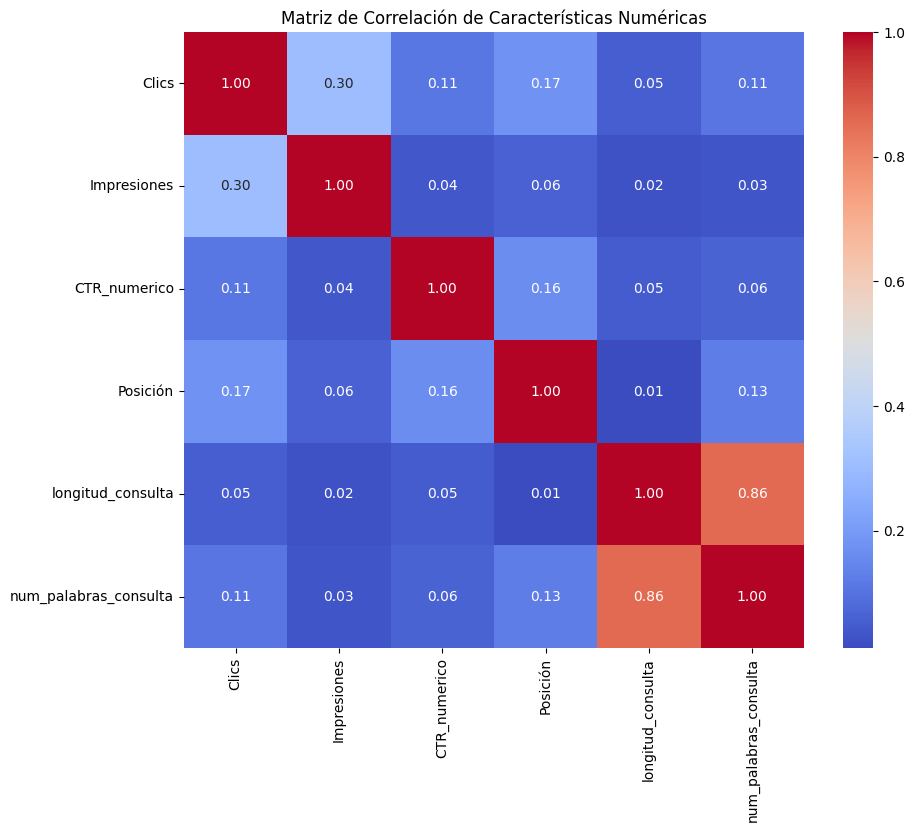

Columnas a eliminar por alta correlación: []
Forma de X después de eliminar por correlación: (1000, 20)

--- PASO 3c: Chi-cuadrado ---
Forma de X (categóricas) después de Chi-cuadrado: (1000, 5)
Características seleccionadas por Chi-cuadrado: ['pos_Pagina 1', 'pos_Otros', 'cortinas', 'negocio', 'puertas']

--- PASO 3d: ANOVA F-test ---
Forma de X (numéricas) después de ANOVA: (1000, 3)
Características seleccionadas por ANOVA: ['Clics', 'Impresiones', 'Posición']

--- PASO 3e: PCA ---
Forma de X después de PCA: (1000, 5)
Varianza explicada por cada componente: [0.24035687 0.19883699 0.1694525  0.10854291 0.08091637]
Varianza explicada acumulada: [0.24035687 0.43919387 0.60864637 0.71718928 0.79810565]

--- PASO 3f: Análisis Factorial (FA) ---
Forma de X después de Análisis Factorial: (1000, 3)


In [26]:
print("\n--- PASO 3: Selección y Extracción de Características ---")

# Por ejemplo, si 'Clics' > 25 es "Alto rendimiento" (1) y <= 25 es "Bajo rendimiento" (0)
# Usaremos df_consultas para la variable objetivo original, antes de escalar 'Clics'
df_procesado['objetivo_ejemplo'] = (df_consultas['Clics'] > 25).astype(int)
print("\nVariable objetivo de ejemplo ('objetivo_ejemplo'):")
print(df_procesado[['objetivo_ejemplo']].head())

# Separar características (X) y objetivo (y)
# Seleccionamos solo características numéricas y codificadas para los selectores
# Excluimos texto original, y columnas intermedias si ya no son necesarias.
columnas_caracteristicas_finales = [
    col for col in df_procesado.columns if col not in [
        'Consultas principales', 'CTR', 'objetivo_ejemplo',
        # 'Posición' si ahora usas las categóricas 'pos_*' y la numérica original no es deseada
        # 'Impresiones' si ahora usas 'Impresiones_yj'
    ]
]
# Asegurémonos de que solo sean numéricas (o que puedan ser tratadas como tal por los selectores)
X = df_procesado[columnas_caracteristicas_finales].copy()
# Algunas columnas TF-IDF pueden tener nombres que no son strings válidos para todos los usos,
# se puede sanitizar si da problemas: X.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X.columns]

# Llenar NaNs que puedan haber surgido (ej. de TF-IDF si alguna consulta era vacía, o de bins)
X = X.fillna(0)


y = df_procesado['objetivo_ejemplo']

print(f"\nForma de X (características) antes de selección: {X.shape}")

# a) Umbral de Varianza
print("\n--- PASO 3a: Umbral de Varianza ---")
# Elimina características con varianza cero o muy baja (casi constantes)
# El umbral es algo a experimentar. threshold=0 eliminará solo las de varianza cero.
selector_var = VarianceThreshold(threshold=0.01) # Ajusta el umbral según sea necesario
# Aplicar solo a características que no sean ya booleanas de OneHot si el umbral es muy bajo.
# Para simplificar, lo aplicamos a todas las X numéricas.
try:
    X_var_reducido = selector_var.fit_transform(X)
    print(f"Forma de X después de Umbral de Varianza: {X_var_reducido.shape}")
    # Para ver qué columnas se mantuvieron:
    # X = pd.DataFrame(X_var_reducido, columns=X.columns[selector_var.get_support()])
except ValueError as e:
    print(f"Error en VarianceThreshold (puede ser por columnas no numéricas aún presentes): {e}")
    print("Revisa que todas las columnas en X sean numéricas.")

# b) Correlación (para características numéricas)
print("\n--- PASO 3b: Correlación ---")
# Usaremos las columnas numéricas que definimos para escalar
# df_numeric_for_corr = df_procesado[cols_para_escalar].copy() # O usa X si ya está limpio y numérico
df_numeric_for_corr = X[[col for col in cols_para_escalar if col in X.columns]].copy()


correlation_matrix = df_numeric_for_corr.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Características Numéricas')
plt.show()

# Eliminar características altamente correlacionadas (ejemplo)
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.90)] # Umbral de 0.90
print(f"Columnas a eliminar por alta correlación: {to_drop_corr}")
X_corr_reducido = X.drop(columns=to_drop_corr, errors='ignore')
print(f"Forma de X después de eliminar por correlación: {X_corr_reducido.shape}")
# Actualizamos X para los siguientes pasos
X = X_corr_reducido.copy()


# c) Chi-cuadrado (Χ²) - Para características categóricas vs objetivo categórico
print("\n--- PASO 3c: Chi-cuadrado ---")
# Necesitamos características de entrada categóricas (o discretizadas/positivas) y un objetivo categórico.
# Las características TF-IDF y One-Hot son adecuadas si son no negativas.
# Las características escaladas con StandardScaler (que pueden ser negativas) NO son adecuadas para Chi2.
# MinMaxScaler las mantendría en [0,1] que sí es válido.
# Vamos a seleccionar las columnas One-Hot y TF-IDF para Chi2.
cols_one_hot = [col for col in X.columns if col.startswith('pos_')]
cols_tfidf = vectorizer_tfidf.get_feature_names_out().tolist()
cols_for_chi2 = [col for col in cols_one_hot + cols_tfidf if col in X.columns]

if cols_for_chi2:
    X_chi2_input = X[cols_for_chi2].copy()
    # Asegurarse que no haya negativos (MinMaxScaler ayudaría aquí, o seleccionar features apropiadas)
    # Si se usó StandardScaler, estas features podrían no ser ideales para chi2.
    # Por TF-IDF y OneHot, deberían ser no-negativas.
    X_chi2_input[X_chi2_input < 0] = 0 # Forzar no negatividad si es necesario (parche)

    # Seleccionar las K mejores características (ej. k=5)
    # El valor de k es a determinar
    k_best_chi2 = min(5, X_chi2_input.shape[1]) # No pedir más de las que hay
    if k_best_chi2 > 0:
        selector_chi2 = SelectKBest(score_func=chi2, k=k_best_chi2)
        try:
            X_chi2_reducido = selector_chi2.fit_transform(X_chi2_input, y)
            chi2_selected_features = X_chi2_input.columns[selector_chi2.get_support()]
            print(f"Forma de X (categóricas) después de Chi-cuadrado: {X_chi2_reducido.shape}")
            print(f"Características seleccionadas por Chi-cuadrado: {chi2_selected_features.tolist()}")
        except ValueError as e:
            print(f"Error en Chi2 (puede ser por valores negativos): {e}")
            print("Asegúrate que las características para Chi2 sean no-negativas.")
    else:
        print("No hay características suficientes para aplicar Chi-cuadrado.")
else:
    print("No hay características adecuadas (categóricas/tfidf/onehot) en X para Chi-cuadrado.")


# d) ANOVA F-test - Para características numéricas vs objetivo categórico
print("\n--- PASO 3d: ANOVA F-test ---")
# Necesitamos características numéricas y un objetivo categórico.
# Usaremos las columnas numéricas que no son TF-IDF ni One-Hot
# (asumiendo que fueron escaladas, por ejemplo, con StandardScaler o MinMaxScaler).
cols_numeric_anova = [col for col in cols_para_escalar if col in X.columns]

if cols_numeric_anova:
    X_anova_input = X[cols_numeric_anova].copy()
    k_best_anova = min(3, X_anova_input.shape[1]) # Ej. k=3, no pedir más de las que hay
    if k_best_anova > 0:
        selector_anova = SelectKBest(score_func=f_classif, k=k_best_anova)
        X_anova_reducido = selector_anova.fit_transform(X_anova_input, y)
        anova_selected_features = X_anova_input.columns[selector_anova.get_support()]
        print(f"Forma de X (numéricas) después de ANOVA: {X_anova_reducido.shape}")
        print(f"Características seleccionadas por ANOVA: {anova_selected_features.tolist()}")
    else:
        print("No hay características suficientes para aplicar ANOVA.")
else:
    print("No hay características numéricas adecuadas en X para ANOVA.")


# e) Análisis de Componentes Principales (PCA) - Extracción, no supervisado
print("\n--- PASO 3e: PCA ---")
# Aplicar a características numéricas (generalmente escaladas).
# Usaremos todas las características en X. Asegúrate que X esté completamente numérico.
# Si hay columnas TF-IDF con muchos ceros (sparse), PCA puede no ser la mejor opción para ellas directamente
# o podría necesitar más componentes para capturar la varianza.

# Asegurar que X sea completamente numérico para PCA
X_for_pca = X.copy()
# Convertir columnas booleanas (de get_dummies) a int si no lo están ya.
for col in X_for_pca.select_dtypes(include='bool').columns:
    X_for_pca[col] = X_for_pca[col].astype(int)

# Si después de las selecciones anteriores X quedó vacío, PCA no se puede aplicar.
if X_for_pca.empty or X_for_pca.shape[1] == 0:
    print("X está vacío o no tiene características, no se puede aplicar PCA.")
else:
    # Es buena idea escalar ANTES de PCA. Si X ya está escalado (parcialmente), está bien.
    # Si no, escala todo X antes de PCA.
    # scaler_pca = StandardScaler()
    # X_scaled_for_pca = scaler_pca.fit_transform(X_for_pca)

    # Decide el número de componentes (ej. para capturar 95% de varianza, o un número fijo)
    # n_components puede ser un int o un float (0.0 a 1.0)
    # Si es un entero, es el número de componentes.
    # Si es un float, es el porcentaje de varianza a retener.
    num_componentes_pca = min(X_for_pca.shape[1], 5) # No más componentes que características, ej max 5
    pca = PCA(n_components=num_componentes_pca)
    try:
        X_pca = pca.fit_transform(X_for_pca) # Usar X_scaled_for_pca si se escaló todo X justo antes
        print(f"Forma de X después de PCA: {X_pca.shape}")
        print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")
        print(f"Varianza explicada acumulada: {np.cumsum(pca.explained_variance_ratio_)}")
        # X_pca es un array numpy, puedes convertirlo a DataFrame si lo deseas:
        # df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
        # print(df_pca.head())
    except ValueError as e:
        print(f"Error en PCA (podría ser por NaNs o no numéricos): {e}")
        print(X_for_pca.info())
        print(X_for_pca.isna().sum())


# f) Análisis Factorial (FA) - Extracción, no supervisado
print("\n--- PASO 3f: Análisis Factorial (FA) ---")
# Similar a PCA, aplicar a características numéricas escaladas.
if X_for_pca.empty or X_for_pca.shape[1] == 0: # Usando la misma X_for_pca preparada antes
     print("X está vacío o no tiene características, no se puede aplicar FA.")
else:
    num_factores_fa = min(X_for_pca.shape[1], 3) # Ej. 3 factores, no más factores que características
    if num_factores_fa > 0:
        fa = FactorAnalysis(n_components=num_factores_fa, random_state=0)
        try:
            X_fa = fa.fit_transform(X_for_pca) # Usar X_scaled_for_pca si se escaló todo X
            print(f"Forma de X después de Análisis Factorial: {X_fa.shape}")
            # X_fa es un array numpy.
            # df_fa = pd.DataFrame(data=X_fa, columns=[f'Factor{i+1}' for i in range(X_fa.shape[1])])
            # print(df_fa.head())
        except ValueError as e:
            print(f"Error en FA (podría ser por NaNs o no numéricos): {e}")
    else:
        print("No hay suficientes características para definir factores en FA.")